# Exploratory Data Analysis

### Importing Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import cm
from tqdm import tqdm

#from mpl_toolkits.basemap import Basemap

#pip install https://github.com/matplotlib/basemap/archive/master.zip

In [2]:
data_path = "../data/AB_NYC_2019.csv"
!wc {data_path}

  49081  384069 7077973 ../data/AB_NYC_2019.csv


In [3]:
df_tmp = pd.read_csv(
    data_path,
    nrows=5
)

columns = list(df_tmp.columns)

print("\nFeatures in dataset:")
for column in columns:
    print(column)

print("\n")
print(df_tmp.info())


Features in dataset:
id
name
host_id
host_name
neighbourhood_group
neighbourhood
latitude
longitude
room_type
price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 16 columns):
id                                5 non-null int64
name                              5 non-null object
host_id                           5 non-null int64
host_name                         5 non-null object
neighbourhood_group               5 non-null object
neighbourhood                     5 non-null object
latitude                          5 non-null float64
longitude                         5 non-null float64
room_type                         5 non-null object
price                             5 non-null int64
minimum_nights                    5 non-null int64
number_of_reviews                 5 non-null int64
last_review                       4 non-null obj

In [4]:
traintypes = {
    'id': 'int32',
    'name': 'str',
    'host_id': 'int32',
    'host_name': 'str',
    'neighbourhood_group': 'str',
    'neighbourhood': 'str',
    'latitude': 'float32',
    'longitude': 'float32',
    'room_type': 'str',
    'price': 'uint16',
    'minimum_nights': 'uint16',
    'number_of_reviews': 'uint16',
    'last_review': 'str',
    'reviews_per_month': 'float16',
    'calculated_host_listings_count': 'uint16',
    'availability_365': 'uint16',
}
cols = list(traintypes.keys())

In [5]:
%%time
df_list = []

chunksize = 1_000_000

for df_chunk in tqdm(
    pd.read_csv(
        data_path, 
        dtype=traintypes, 
        chunksize=chunksize
    )
):
    df_chunk['last_review'] = df_chunk['last_review'].str.slice(0, 16)
    df_chunk['last_review'] = pd.to_datetime(df_chunk['last_review'], utc=True, format='%Y-%m-%d %H:%M')
    
    df_list.append(df_chunk)

1it [00:00,  4.15it/s]

CPU times: user 114 ms, sys: 20.2 ms, total: 135 ms
Wall time: 262 ms


In [6]:
bnb_df = pd.concat(df_list[0:1])
bnb_df = bnb_df[~bnb_df.isin([np.nan, np.inf, -np.inf]).any(1)]

del df_list

bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
id                                38821 non-null int32
name                              38821 non-null object
host_id                           38821 non-null int32
host_name                         38821 non-null object
neighbourhood_group               38821 non-null object
neighbourhood                     38821 non-null object
latitude                          38821 non-null float32
longitude                         38821 non-null float32
room_type                         38821 non-null object
price                             38821 non-null uint16
minimum_nights                    38821 non-null uint16
number_of_reviews                 38821 non-null uint16
last_review                       38821 non-null datetime64[ns, UTC]
reviews_per_month                 38821 non-null float16
calculated_host_listings_count    38821 non-null uint16
availability_365                  388

In [7]:
print("Number of records in dataset: {}".format(bnb_df.shape[0]))

print("\n==Basic Stats==")
print(bnb_df.describe())

Number of records in dataset: 38821

==Basic Stats==
                 id       host_id      latitude     longitude         price  \
count  3.882100e+04  3.882100e+04  38821.000000  38821.000000  38821.000000   
mean   1.810081e+07  6.424582e+07     40.728130    -73.951149    142.332526   
std    1.069372e+07  7.589752e+07      0.054991      0.046693    196.994756   
min    2.539000e+03  2.438000e+03     40.506409    -74.244423      0.000000   
25%    8.721444e+06  7.029525e+06     40.688641    -73.982460     69.000000   
50%    1.887286e+07  2.837092e+07     40.721710    -73.954811    101.000000   
75%    2.756746e+07  1.018905e+08     40.762989    -73.935020    170.000000   
max    3.645581e+07  2.738417e+08     40.913059    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    38821.000000       38821.000000       38821.000000   
mean         5.869220          29.290255           1.373047   
std         17.389026          48.182900      

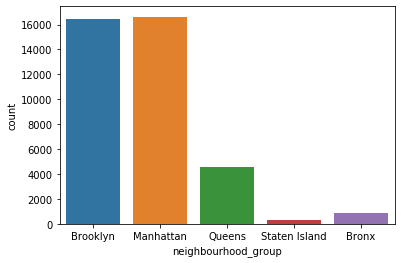

In [8]:
sns.countplot(bnb_df["neighbourhood_group"])

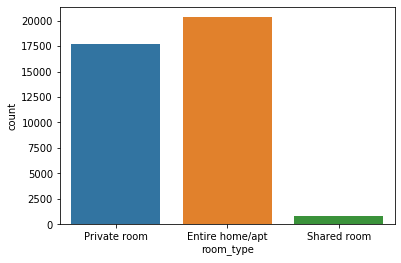

In [9]:
sns.countplot(bnb_df["room_type"])

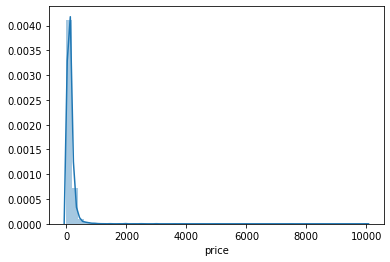

In [10]:
sns.distplot(bnb_df["price"])

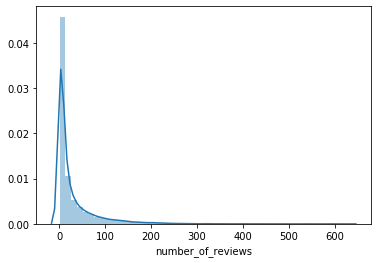

In [11]:
sns.distplot(bnb_df["number_of_reviews"])

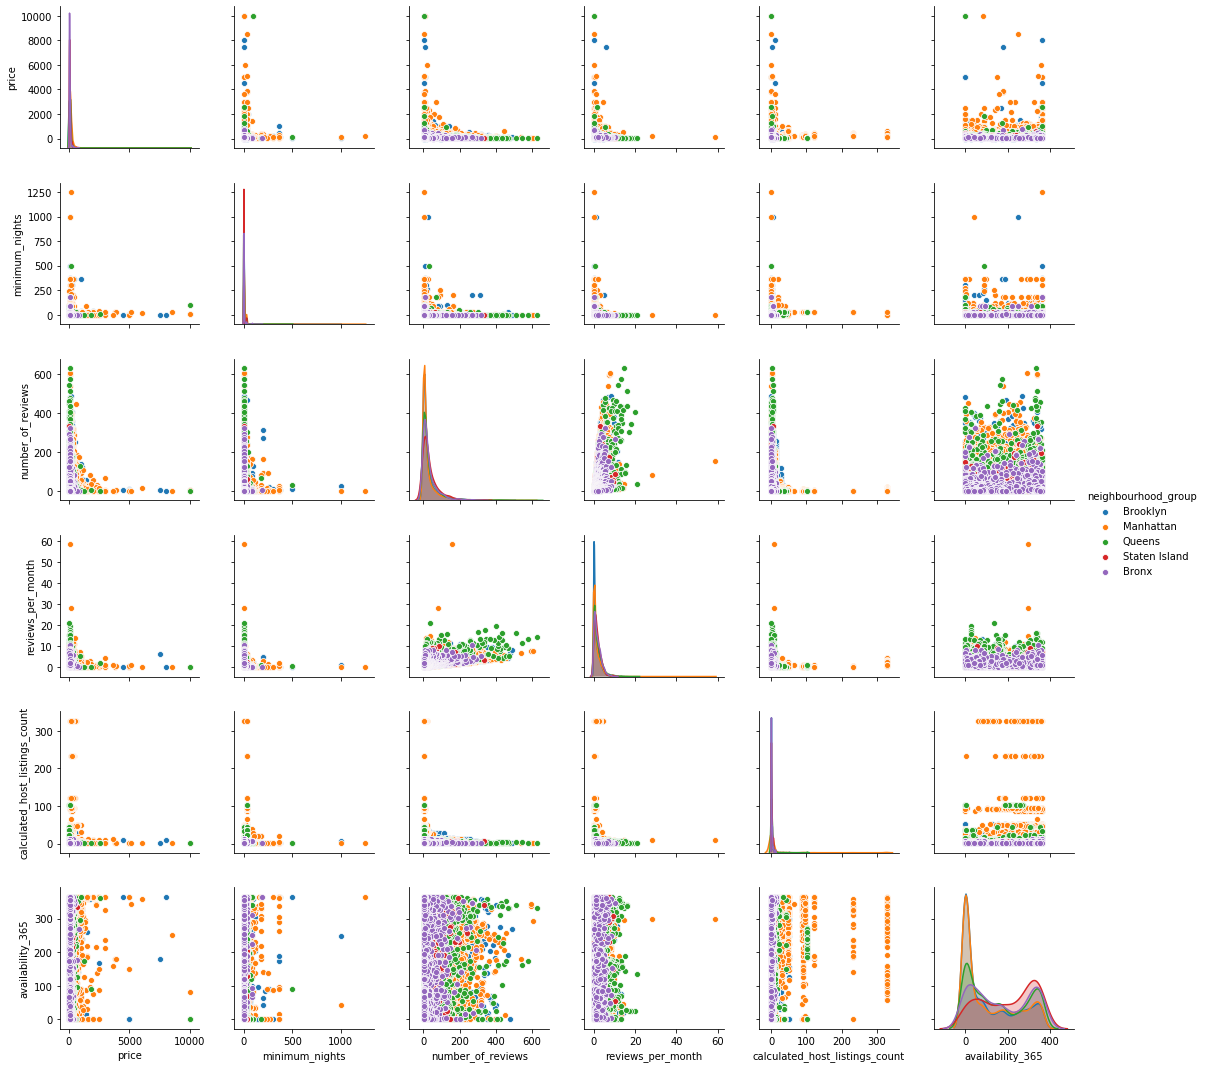

In [12]:
remove_outliers = False

pair_features = [
    "neighbourhood_group",
    "price",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365"
]

neighbourhoods = [
    "Brooklyn",
    "Manhattan",
    "Queens",
    "Staten Island",
    "Bronx"
]

pair_df = bnb_df[pair_features]

if remove_outliers:
    
    for feature in pair_features[1:]:
        outlier_value = np.percentile(pair_df[feature].values, 95)
        pair_df = pair_df[pair_df[feature] < outlier_value]
    
    for ix, feature in enumerate(pair_features[1:]):
        plt.figure(figsize=(8,8))
        for n in neighbourhoods:
            sns.distplot(pair_df[feature][pair_df["neighbourhood_group"] == n], hist=False)        
        plt.show()
    
else:
    sns.pairplot(data=pair_df, hue="neighbourhood_group")

In [13]:
# plt.figure(figsize=(10,10))

# # https://boundingbox.klokantech.com/
# # (latitude, longitude) == (row, col)
# bbox_raw = [
#     [-74.25909008,40.47739894], # lower-left
#     [-73.70018092,40.47739894], # upper-left
#     [-73.70018092,40.91617849], # upper-right
#     [-74.25909008,40.91617849], # lower-right
#     [-74.25909008,40.47739894]  # lower-left
# ]

# min_lat = min([coord[1] for coord in bbox_raw])
# min_lon = min([coord[0] for coord in bbox_raw])

# max_lat = max([coord[1] for coord in bbox_raw])
# max_lon = max([coord[0] for coord in bbox_raw])

# center_lat = min_lat + max_lat / 2
# center_lon = min_lon + max_lon / 2

# ll_crnr = (min_lat, min_lon)
# lr_crnr = (min_lat, max_lon)

# ur_crnr = (max_lat, max_lon)
# ul_crnr = (max_lat, min_lon)

# shape_path = "../data/shapefiles/nyc_neighborhoods.shp"

# expansion = -0.1

# m = Basemap(
#     llcrnrlon=min_lon - expansion,
#     llcrnrlat=min_lat - expansion,
#     urcrnrlon=max_lon + expansion,
#     urcrnrlat=max_lat + expansion,
#     epsg=2263
#     #resolution='f',
#     #projection='mill',
# )

# # map.drawmapboundary(fill_color='aqua')
# # map.fillcontinents(color='#ddaa66',lake_color='aqua')
# # map.drawcoastlines()
# # map.drawstates()
# # map.drawrivers()
# m.arcgisimage(service='World_Street_Map', xpixels = 3000)

# x, y = m(bnb_df['longitude'].values, bnb_df['latitude'].values)

# m.hexbin(x, y, gridsize=1000, bins='log', cmap=cm.YlOrRd_r)
# # m.scatter(
# #     x, y
# # )

# plt.show()